# DS 4420 Final Project: Collaborative Filtering
Manual Python Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Data Preparation

#### EDA

In [2]:
# load the data
users = pd.read_csv('PP_users.csv')
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')

In [3]:
# check shape
print('Shape:', users.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(users.u.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(users.isna().astype(int).sum())

# dropping arbitrary columns
print('\nDropped Columns: n_items, techniques')
users.drop(['n_items', 'techniques'], axis=1, inplace=True)

# rename columns for consistency
users.rename(columns={'u':'user_id', 'items':'recipes'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(users.dtypes)

# display final shape
print('\nUsers Shape:', users.shape)
print('\n')

users.head()

Shape: (25076, 6)

Duplicates: 0

Null Values:
u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64

Dropped Columns: n_items, techniques

Datatypes:
user_id       int64
recipes      object
ratings      object
n_ratings     int64
dtype: object

Users Shape: (25076, 4)




,user_id,recipes,ratings,n_ratings
0,0,"[1118, 27680, 32541, 137353, 16428, 28815, 658...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[122140, 77036, 156817, 76957, 68818, 155600, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[168054, 87218, 35731, 1, 20475, 9039, 124834,...","[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[163193, 156352, 102888, 19914, 169438, 55772,...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[72857, 38652, 160427, 55772, 119999, 141777, ...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [4]:
# check shape
print('Shape:', recipes.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(recipes.id.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(recipes.isna().astype(int).sum())

# drop null name
recipes.dropna(subset='name', inplace=True)

# rename columns for consistency
recipes.rename(columns={'id':'recipe_id'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(recipes.dtypes)

# display final shape
print('\nRecipes Shape:', recipes.shape)
print('\n')

recipes.head()

Shape: (231637, 12)

Duplicates: 0

Null Values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Datatypes:
name              object
recipe_id          int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Recipes Shape: (231636, 12)




,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
# check shape
print('Shape:', interactions.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(interactions.groupby(['user_id','recipe_id']).count().reset_index()[['user_id','recipe_id']].value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(interactions.isna().astype(int).sum())

# check datatypes
print('\nDatatypes:')
print(interactions.dtypes)

# display final shape
print('\nInteractions Shape:', interactions.shape)
print('\n')

# save a copy of the full 18 years data
interactions_full = interactions.copy()

# filter for the latest 3 years (2015-2018) of data for model
interactions_3yr = interactions[interactions.date > '2015']
interactions = interactions_3yr.copy()

interactions.head()

Shape: (1132367, 5)

Duplicates: 0

Null Values:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

Datatypes:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

Interactions Shape: (1132367, 5)




,user_id,recipe_id,date,rating,review
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
19,2000049093,200236,2015-03-08,5,I love lamb stew and usually make an Irish ver...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
67,2002097693,79222,2018-04-05,0,Do you have cook the potatoes beforehand?
117,422608,441096,2016-02-26,5,"I didn&#039;t follow the instructions exactly,..."


#### Cleaning for CF

In [6]:
# delete ratings = 0
interactions_fixed = interactions.copy()
print(f"before removing zero ratings: {len(interactions_fixed)} rows")
interactions_fixed = interactions_fixed[interactions_fixed['rating'] > 0]
print(f"after removing zero ratings: {len(interactions_fixed)} rows")

# select relevant columns
ratings = interactions_fixed[['user_id', 'recipe_id', 'rating', 'date']]
ratings['date'] = pd.to_datetime(ratings.date)
ratings.head() 

before removing zero ratings: 89230 rows
after removing zero ratings: 73009 rows


,user_id,recipe_id,rating,date
7,2000192946,120345,2,2015-05-10
19,2000049093,200236,5,2015-03-08
117,422608,441096,5,2016-02-26
189,2000405375,195977,4,2015-08-15
190,2000488445,195977,4,2015-09-21


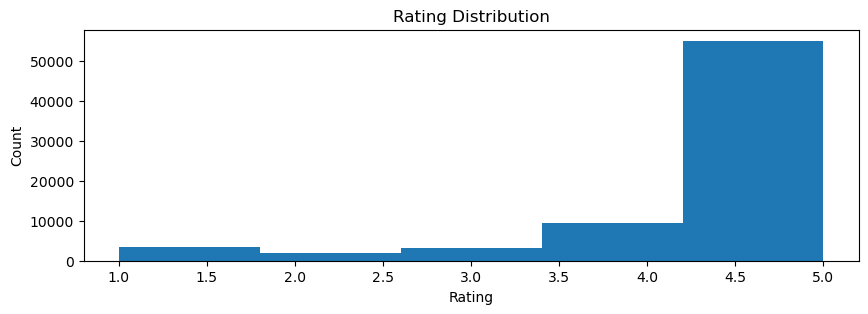

original rating counts:



rating
1     3459
2     1939
3     3195
4     9391
5    55025
Name: count, dtype: int64

target count per rating: 1939

sampled 1939 from rating 1
kept all 1939 examples of rating 2
sampled 1939 from rating 3
sampled 1939 from rating 4
sampled 1939 from rating 5


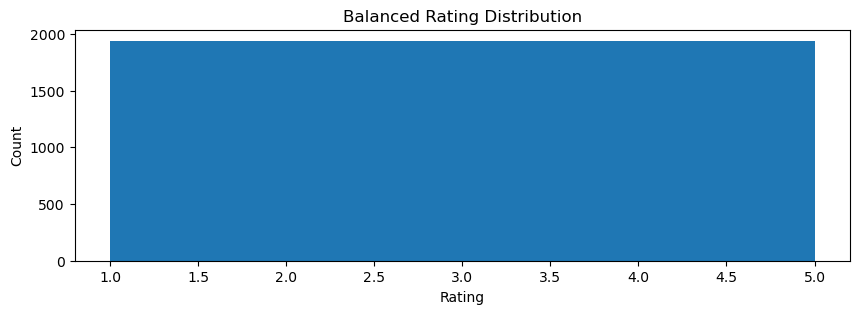


users with at least 2 ratings: 454

final dataset: 1722 ratings
number of unique users: 454
number of unique items: 1640


,user_id,recipe_id,rating,date,days_ago,weight,original_rating
861938,2000372458,261889,1,2015-12-13,1103,0.350878,1
351123,2635439,16531,1,2015-02-10,1409,0.262404,1
348027,2001480120,44133,1,2017-06-13,555,0.590384,1
1007460,2001511660,34753,1,2017-06-17,551,0.592631,1
273430,1803005318,167202,1,2015-03-11,1380,0.269730,1


In [7]:
# set params for preprocessing (included to switch between methods)
balance_ratings = True
time_decay = True

# ============= TIME DECAY ============= #
if time_decay and 'date' in ratings.columns:
    # calculate recency in days from the most recent date
    max_date = ratings['date'].max()
    ratings['days_ago'] = (max_date - ratings['date']).dt.days
    
    # apply exponential decay (recent ratings matter more)
    halflife_days = 365*2  # ratings lose half their weight after 2 years
    decay_factor = np.log(2) / halflife_days
    ratings['weight'] = np.exp(-decay_factor * ratings['days_ago'])
    
    # store original ratings
    ratings['original_rating'] = ratings['rating']


# ============= BALANCING ============= #
# Check rating distribution
plt.figure(figsize=(10, 3))
plt.hist(ratings['rating'], bins=5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
    
if balance_ratings:
    rating_counts = ratings['rating'].value_counts().sort_index()
    print("original rating counts:\n")
    display(rating_counts)
    
    # determine target count
    min_counts = [count for count in rating_counts.values]
    if min_counts:
        target_count = min(min_counts)
    
    print(f"target count per rating: {target_count}\n")
    
    # balance by sampling
    balanced_df = []
    for rating in range(1, 6):
        if rating in rating_counts.index:
            if rating_counts[rating] > target_count:
                balanced_df.append(ratings[ratings['rating'] == rating].sample(target_count))
                print(f"sampled {target_count} from rating {rating}")
            else:
                balanced_df.append(ratings[ratings['rating'] == rating])
                print(f"kept all {rating_counts[rating]} examples of rating {rating}")
    
    ratings = pd.concat(balanced_df)
    
    # Show balanced distribution
    plt.figure(figsize=(10, 3))
    plt.hist(ratings['rating'], bins=5)
    plt.title('Balanced Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()
    
# ============= VALID USERS ============= #
user_counts = ratings['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index # only keep users with >=2 ratings
ratings = ratings[ratings['user_id'].isin(valid_users)]
print(f"\nusers with at least 2 ratings: {len(valid_users)}")

# final dataset summary
print(f"\nfinal dataset: {len(ratings)} ratings")
print(f"number of unique users: {ratings['user_id'].nunique()}")
print(f"number of unique items: {ratings['recipe_id'].nunique()}")

ratings.head()

### Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_df, test_df = train_test_split(
        ratings,
        test_size=.20, # 80/20 split
        stratify=ratings['rating'],
        random_state=42
)
    
print(f"Train set: {len(train_df)} samples")
print(f"Test set: {len(test_df)} samples")

Train set: 1377 samples
Test set: 345 samples


### Method 1: Item-Item CF (Manual Implementation)

In [9]:
def cosine_similarity(matrix):
    """
    Calculate cosine similarity matrix in a vectorized way.
    """
    dot_product = np.dot(matrix, matrix.T)
    norms = np.sqrt(np.sum(matrix**2, axis=1))
    #norms[norms == 0] = 1e-10
    norm_matrix = np.outer(norms, norms)
    similarity = dot_product / norm_matrix
    return similarity

In [10]:
# pure item-item collaborative filtering
def item_item_cf_predict(train_df, test_df, n_neighbors):
    """
    predict ratings using pure item-item collaborative filtering.
    """
    # build item-user matrix
    item_user_matrix = train_df.pivot_table(index='user_id', columns='recipe_id', values='rating').fillna(0).T
    
    # get recipe and user indices
    recipe_indices, user_indices = item_user_matrix.index, item_user_matrix.columns

    # calculate cosine_similarity
    item_similarity = cosine_similarity(item_user_matrix.values)
    
    # create a mapping from recipe_id to index
    recipe_to_idx = {recipe: i for i, recipe in enumerate(recipe_indices)}
    
    # global average rating with time decay weights
    global_avg = np.average(train_df['rating'], weights=train_df['weight'])
    
    # user average ratings
    user_avg = train_df.groupby('user_id')['rating'].mean()
    
    # predict for each user-recipe pair in test set
    predictions = []
    for i, row in test_df.iterrows():
        user_id, recipe_id = row['user_id'], row['recipe_id']
        
        # user bias
        user_bias = 0
        if user_id in user_avg.index:
            user_bias = user_avg[user_id] - global_avg
        
        # if recipe not in training set, predict user's average or global average
        if recipe_id not in recipe_to_idx:
            if user_id in user_avg.index:
                predictions.append(user_avg[user_id])
            else:
                predictions.append(global_avg)
            continue
        
        # get recipe index
        recipe_idx = recipe_to_idx[recipe_id]
        
        # get user's ratings
        if user_id in user_indices:
            user_ratings = item_user_matrix.T.loc[user_id]
            rated_recipes = user_ratings[user_ratings > 0]
        else:
            # if user not in training, use their bias with global average
            predictions.append(global_avg + user_bias)
            continue
        
        # if user hasn't rated any items, predict global average with bias
        if len(rated_recipes) == 0:
            predictions.append(global_avg + user_bias)
            continue
        
        # find similar recipes to this recipe that the user has rated
        similar_items = []
        for rated_recipe, rating in rated_recipes.items():
            if rated_recipe in recipe_to_idx:
                idx = recipe_to_idx[rated_recipe]
                sim = item_similarity[recipe_idx, idx]
                similar_items.append((sim, rating))
        
        # if no similar recipes, predict user's average or global average with bias
        if len(similar_items) == 0:
            if user_id in user_avg.index:
                predictions.append(user_avg[user_id])
            else:
                predictions.append(global_avg + user_bias)
            continue
        
        # take top n similar recipes
        similar_items.sort(reverse=True)
        top_n = similar_items[:n_neighbors]
        
        # sum sim scores to calculate weighted average
        sum_sim = sum(sim for sim, _ in top_n)
        if sum_sim == 0:
            # if all similarities are zero, predict user's average
            if user_id in user_avg.index:
                predictions.append(user_avg[user_id])
            else:
                predictions.append(global_avg + user_bias)
            continue
            
        weighted_ratings = sum(sim * rating for sim, rating in top_n)
        prediction = weighted_ratings / sum_sim
        
        # blend with user bias
        blended_prediction = 0.7 * prediction + 0.3 * (global_avg + user_bias)
        predictions.append(blended_prediction)
    
    return predictions


=== Results ===
Item-Item CF:
RMSE: 1.1809
MAE: 0.8789
R²: 0.0288


Text(0.5, 1.0, 'Item-Item CF: Predictions vs Actual')

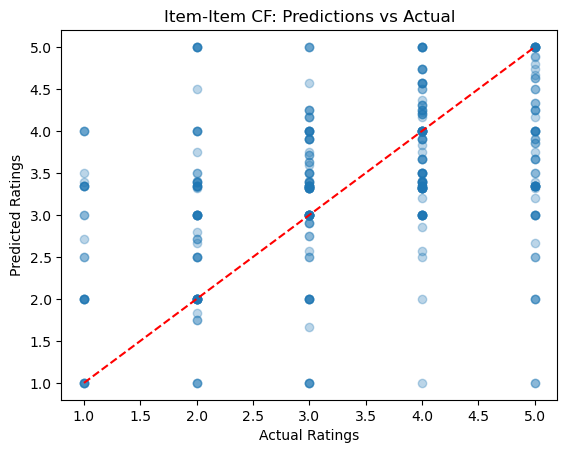

In [11]:
# define y_pred and y_true
y_pred_CF = item_item_cf_predict(train_df, test_df, n_neighbors=10)
y_true = test_df['rating'].values

# calculate r2 and rmse
item_rmse = np.sqrt(mean_squared_error(y_true, y_pred_CF))
item_r2 = r2_score(y_true, y_pred_CF)
item_mae = np.mean(np.abs(np.array(y_pred_CF) - y_true))

print("\n=== Results ===")
print("Item-Item CF:")
print(f"RMSE: {item_rmse:.4f}")
print(f"MAE: {item_mae:.4f}")
print(f"R²: {item_r2:.4f}")

# display results
plt.scatter(y_true, y_pred_CF, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Item-Item CF: Predictions vs Actual')

### Method 2: CF + SVD, Simple Ensemble

In [12]:
from scipy.sparse.linalg import svds

def svd_predict(train_df, test_df, n_factors=25):
    """
    Predict ratings using SVD
    """
    
    # create user and item mapping
    user_ids = sorted(train_df['user_id'].unique())
    recipe_ids = sorted(train_df['recipe_id'].unique())
    user_to_idx = {user: i for i, user in enumerate(user_ids)}
    recipe_to_idx = {recipe: i for i, recipe in enumerate(recipe_ids)}
    
    # create user-item matrix
    n_users, n_recipes = len(user_ids), len(recipe_ids)
    user_item_matrix = np.zeros((n_users, n_recipes))
    
    # fill matrix with ratings and weights
    for _, row in train_df.iterrows():
        user_idx = user_to_idx[row['user_id']]
        recipe_idx = recipe_to_idx[row['recipe_id']]
        rating = row['rating']
        
        # apply weight
        weight = row['weight']
        global_mean = train_df['rating'].mean()
        adjusted_rating = weight * rating + (1 - weight) * global_mean
        user_item_matrix[user_idx, recipe_idx] = adjusted_rating

    # global average rating with time decay weights
    global_avg = np.average(train_df['rating'], weights=train_df['weight'])

    # calculate user and item biases
    user_biases = np.zeros(n_users)
    recipe_biases = np.zeros(n_recipes)
    
    # calculate user bias (average deviation from global average)
    for i in range(n_users):
        user_ratings = user_item_matrix[i, :]
        rated_items = user_ratings != 0
        if np.any(rated_items):
            user_biases[i] = np.mean(user_ratings[rated_items]) - global_avg
    
    # calculate item bias (average deviation after accounting for user bias)
    for j in range(n_recipes):
        item_ratings = user_item_matrix[:, j]
        rated_users = item_ratings != 0
        if np.any(rated_users):
            recipe_biases[j] = np.mean(item_ratings[rated_users] - user_biases[rated_users]) - global_avg
    
    # center the ratings by removing biases
    for i in range(n_users):
        for j in range(n_recipes):
            if user_item_matrix[i, j] > 0:
                user_item_matrix[i, j] -= (global_avg + user_biases[i] + recipe_biases[j])

    # perform svd with more factors (increased from 15 to 25)
    U, sigma, Vt = svds(user_item_matrix, k=min(n_factors, min(n_users, n_recipes)-1))
    
    # convert sigma to diagonal matrix
    sigma_diag = np.diag(sigma)
    
    # predict for each user-recipe pair in test set
    predictions = []
    for _, row in test_df.iterrows():
        user_id = row['user_id']
        recipe_id = row['recipe_id']
        
        # if user or recipe not in training set, use global average with available biases
        if user_id not in user_to_idx or recipe_id not in recipe_to_idx:
            user_bias = 0
            recipe_bias = 0
            
            if user_id in user_to_idx:
                user_bias = user_biases[user_to_idx[user_id]]
            elif recipe_id in recipe_to_idx:
                recipe_bias = recipe_biases[recipe_to_idx[recipe_id]]
                
            predictions.append(global_avg + user_bias + recipe_bias)
            continue
        
        # get indices
        user_idx, recipe_idx = user_to_idx[user_id], recipe_to_idx[recipe_id]
        
        # calculate prediction using svd
        user_factor = U[user_idx, :]
        recipe_factor = Vt[:, recipe_idx]
        
        # predicted rating = global average + user bias + item bias + factor interaction
        predicted_rating = global_avg + user_biases[user_idx] + recipe_biases[recipe_idx] + np.dot(user_factor, np.dot(sigma_diag, recipe_factor))
        
        # ensure prediction is in range
        predicted_rating = max(1, min(5, predicted_rating))
        
        predictions.append(predicted_rating)
    
    return predictions

In [13]:
def ensemble_predict(item_pred, svd_pred, actual=None, item_weight=None):
    """
    Blend predictions from Item-Item CF and SVD using a weighted average.
    """
    # ensure inputs are numpy arrays
    item_pred = np.array(item_pred)
    svd_pred = np.array(svd_pred)
    
    # find optimal weight if actuals are provided
    if actual is not None and item_weight is None:
        best_rmse = float('inf')
        best_weight = 0.5
        
        for weight in np.arange(0, 1.05, 0.05):
            ensemble_pred = weight * item_pred + (1 - weight) * svd_pred
            rmse =np.sqrt(mean_squared_error(actual, ensemble_pred))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_weight = weight
        
        item_weight = best_weight
        print(f"found optimal item-cf weight: {item_weight:.2f}")
    
    # use the provided weight or default to 0.7
    if item_weight is None:
        item_weight = 0.7
    
    # calculate svd weight
    svd_weight = 1 - item_weight
    
    # create ensemble predictions
    ensemble_pred = item_weight * item_pred + svd_weight * svd_pred
    
    return ensemble_pred, item_weight

found optimal item-cf weight: 0.10

=== Results ===
Item-Item CF:
RMSE: 1.1809
MAE: 0.8789
R²: 0.0288

SVD Matrix Factorization:
RMSE: 1.0925
MAE: 0.8890
R²: 0.1688

Optimized Ensemble (Item-CF: 0.10, SVD: 0.90):
RMSE: 1.0917
MAE: 0.8823
R²: 0.1700


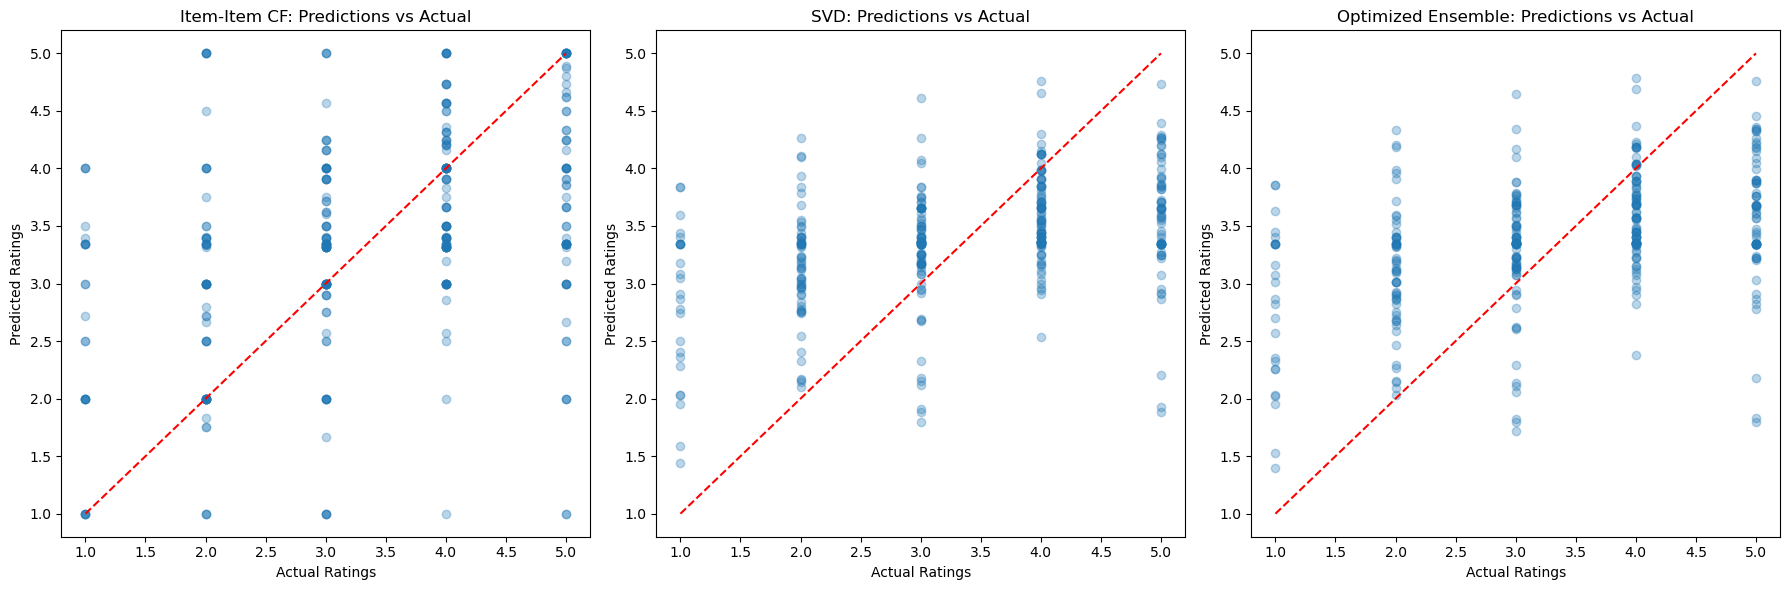

In [14]:
# get y_pred and y_true for both models
y_pred_item = item_item_cf_predict(train_df, test_df, n_neighbors=10)
y_pred_svd = svd_predict(train_df, test_df, n_factors=25)
y_true = test_df['rating'].values

# Create optimized ensemble predictions
y_pred_ensemble, best_weight = ensemble_predict(y_pred_item, y_pred_svd, y_true)

# calculate metrics
item_rmse = np.sqrt(mean_squared_error(y_true, y_pred_item))
item_r2 = r2_score(y_true, y_pred_item)
item_mae = np.mean(np.abs(np.array(y_pred_item) - y_true))

svd_rmse = np.sqrt(mean_squared_error(y_true, y_pred_svd))
svd_r2 = r2_score(y_true, y_pred_svd)
svd_mae = np.mean(np.abs(np.array(y_pred_svd) - y_true))

ens_rmse = np.sqrt(mean_squared_error(y_true, y_pred_ensemble))
ens_r2 = r2_score(y_true, y_pred_ensemble)
ens_mae = np.mean(np.abs(y_pred_ensemble - y_true))

print("\n=== Results ===")
print("Item-Item CF:")
print(f"RMSE: {item_rmse:.4f}")
print(f"MAE: {item_mae:.4f}")
print(f"R²: {item_r2:.4f}")

print("\nSVD Matrix Factorization:")
print(f"RMSE: {svd_rmse:.4f}")
print(f"MAE: {svd_mae:.4f}")
print(f"R²: {svd_r2:.4f}")

print(f"\nOptimized Ensemble (Item-CF: {best_weight:.2f}, SVD: {1-best_weight:.2f}):")
print(f"RMSE: {ens_rmse:.4f}")
print(f"MAE: {ens_mae:.4f}")
print(f"R²: {ens_r2:.4f}")

# plot predictions vs actual for all approaches
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_true, y_pred_item, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Item-Item CF: Predictions vs Actual')

plt.subplot(1, 3, 2)
plt.scatter(y_true, y_pred_svd, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('SVD: Predictions vs Actual')

plt.subplot(1, 3, 3)
plt.scatter(y_true, y_pred_ensemble, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Optimized Ensemble: Predictions vs Actual')

plt.tight_layout()
plt.show()

### Method 3: CF + SVD + Additional Features, Random Forest Ensemble

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def advanced_ensemble_predict(item_pred, svd_pred, actual, test_df):
    """
    Create an advanced ensemble using Random Forest to combine predictions.
    """
    print("Building advanced ensemble with Random Forest...")
    
    # Convert lists to numpy arrays
    item_pred = np.array(item_pred)
    svd_pred = np.array(svd_pred)
    actual = np.array(actual)
    
    # Create feature matrix for ensemble
    # Basic features: Item-CF and SVD predictions
    X_basic = np.column_stack([item_pred, svd_pred])
    
    # Add more features from test_df that might help the ensemble
    additional_features = []
    
    # Add user bias (how much each user deviates from the global average)
    user_avg = test_df.groupby('user_id')['rating'].mean().to_dict()
    global_avg = test_df['rating'].mean()
    user_bias = test_df['user_id'].map(lambda x: user_avg.get(x, global_avg) - global_avg)
    additional_features.append(user_bias)
    
    # Add feature for prediction difference (how much the models disagree)
    pred_diff = np.abs(item_pred - svd_pred)
    additional_features.append(pred_diff)
    
    # Add confidence score based on how many ratings were used
    if 'weight' in test_df.columns:
        additional_features.append(test_df['weight'])
        
    # If we have date information, add recency features
    if 'days_ago' in test_df.columns:
        # Normalize days_ago to 0-1 range
        max_days = test_df['days_ago'].max() or 1
        recency = 1 - (test_df['days_ago'] / max_days)
        additional_features.append(recency)
    
    # Stack all features together
    if additional_features:
        X = np.column_stack([X_basic] + additional_features)
    else:
        X = X_basic
    
    # Split data for training the ensemble
    # Use cross-validation to avoid overfitting
    ensemble_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        random_state=42
    )
    
    # Validate the ensemble model
    cv_scores = cross_val_score(
        ensemble_model,
        X,
        actual,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    
    print(f"Cross-validation RMSE: {np.mean(np.sqrt(-cv_scores)):.4f}")
    
    # Train on all data
    ensemble_model.fit(X, actual)
    
    # Make predictions
    ensemble_pred = ensemble_model.predict(X)
    
    # Print feature importances
    feature_names = ['Item-CF', 'SVD'] + ['Feature_'+str(i) for i in range(len(additional_features))]
    importances = ensemble_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("\nFeature ranking:")
    for f in range(min(len(feature_names), len(importances))):
        print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")
    
    return ensemble_pred

found optimal item-cf weight: 0.10

=== Advanced Random Forest Ensemble ===
Building advanced ensemble with Random Forest...
Cross-validation RMSE: 0.6071

Feature ranking:
1. Feature_0 (0.9236)
2. Feature_3 (0.0271)
3. Feature_2 (0.0270)
4. Feature_1 (0.0154)
5. SVD (0.0038)
6. Item-CF (0.0031)

=== Results ===
Item-Item CF:
RMSE: 1.1809
MAE: 0.8789
R²: 0.0288

SVD Matrix Factorization:
RMSE: 1.0925
MAE: 0.8890
R²: 0.1688

Simple Weighted Ensemble (Item-CF: 0.10, SVD: 0.90):
RMSE: 1.0917
MAE: 0.8823
R²: 0.1700

Advanced Random Forest Ensemble:
RMSE: 0.4593
MAE: 0.2633
R²: 0.8531


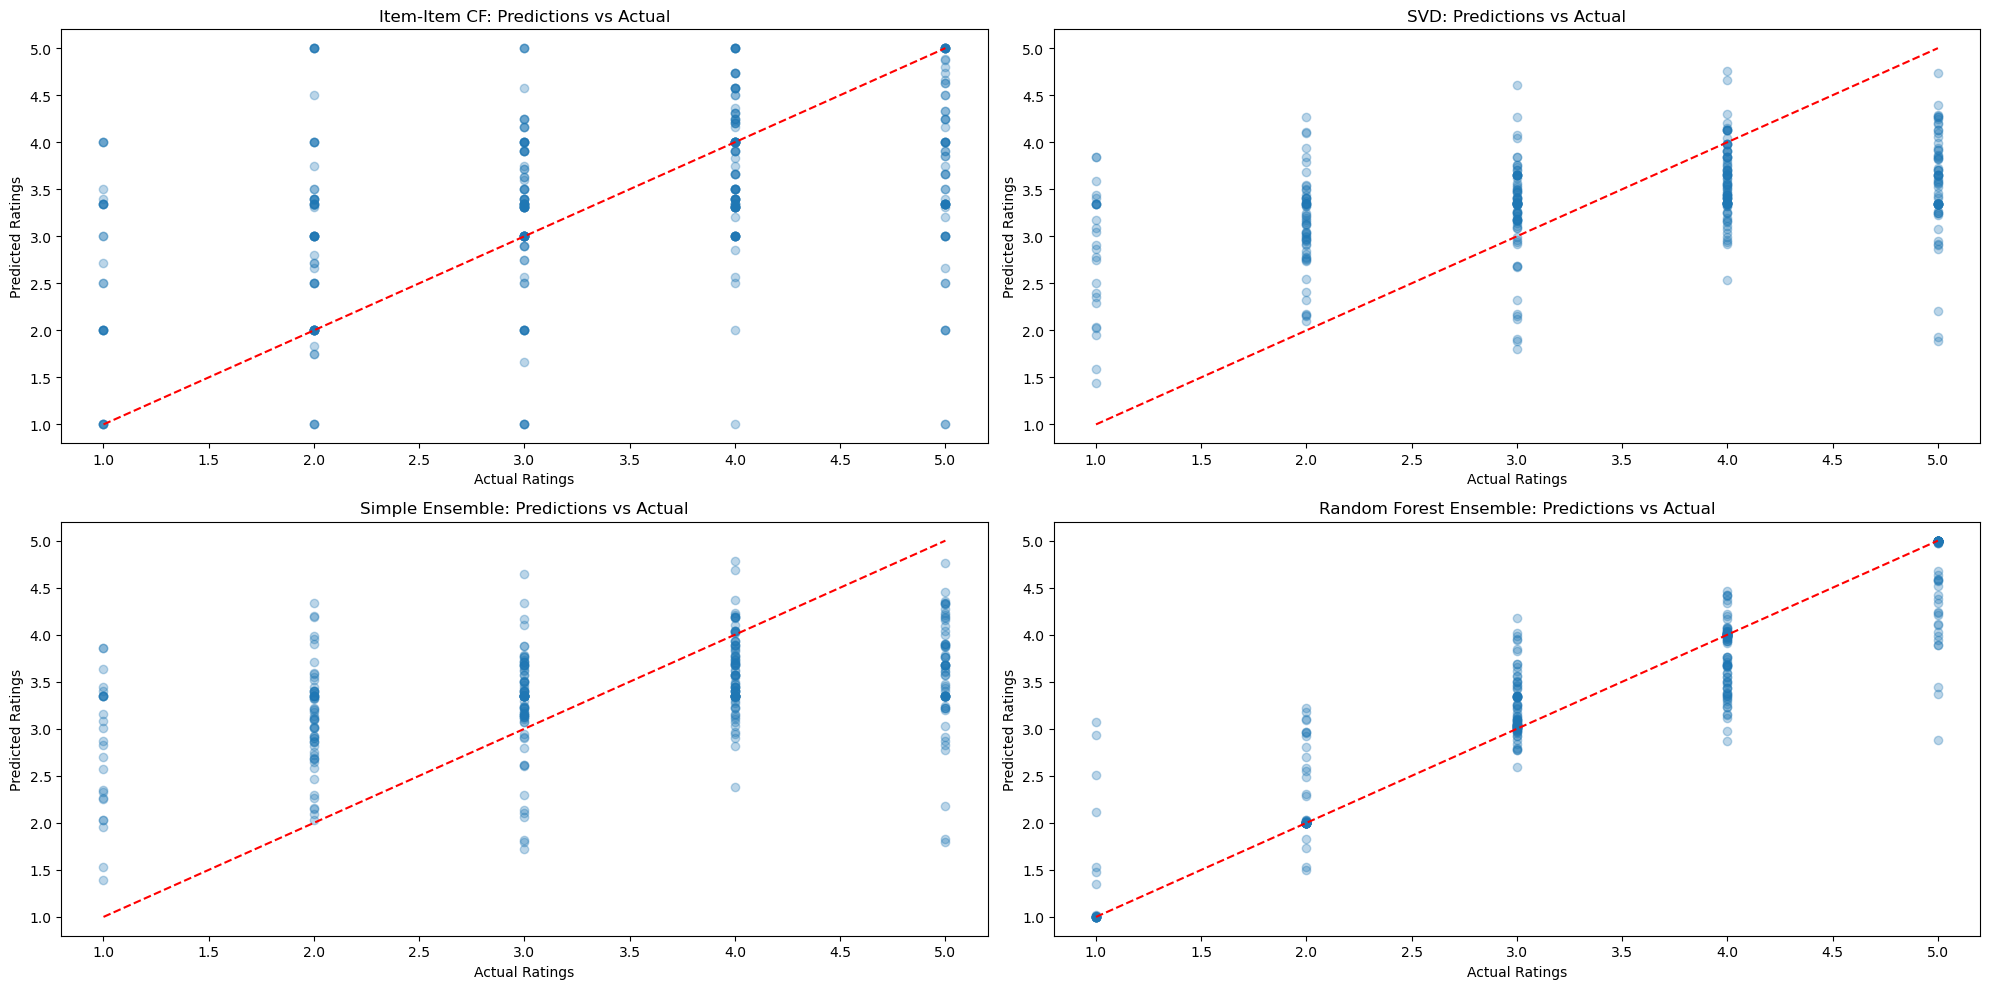

In [16]:
# get y_pred and y_true for all models
y_pred_item = item_item_cf_predict(train_df, test_df, n_neighbors=10)
y_pred_svd = svd_predict(train_df, test_df, n_factors=25)
simple_y_pred_ensemble, best_weight = ensemble_predict(y_pred_item, y_pred_svd, y_true)
y_true = test_df['rating'].values

# create advanced ensemble with Random Forest
print("\n=== Advanced Random Forest Ensemble ===")
rf_y_pred_ensemble = advanced_ensemble_predict(y_pred_item, y_pred_svd, y_true, test_df)

# calculate metrics
item_rmse = np.sqrt(mean_squared_error(y_true, y_pred_item))
item_r2 = r2_score(y_true, y_pred_item)
item_mae = np.mean(np.abs(np.array(y_pred_item) - y_true))

svd_rmse = np.sqrt(mean_squared_error(y_true, y_pred_svd))
svd_r2 = r2_score(y_true, y_pred_svd)
svd_mae = np.mean(np.abs(np.array(y_pred_svd) - y_true))

simple_ens_rmse = np.sqrt(mean_squared_error(y_true, simple_y_pred_ensemble))
simple_ens_r2 = r2_score(y_true, simple_y_pred_ensemble)
simple_ens_mae = np.mean(np.abs(simple_y_pred_ensemble - y_true))

rf_ens_rmse = np.sqrt(mean_squared_error(y_true, rf_y_pred_ensemble))
rf_ens_r2 = r2_score(y_true, rf_y_pred_ensemble)
rf_ens_mae = np.mean(np.abs(rf_y_pred_ensemble - y_true))

print("\n=== Results ===")
print("Item-Item CF:")
print(f"RMSE: {item_rmse:.4f}")
print(f"MAE: {item_mae:.4f}")
print(f"R²: {item_r2:.4f}")

print("\nSVD Matrix Factorization:")
print(f"RMSE: {svd_rmse:.4f}")
print(f"MAE: {svd_mae:.4f}")
print(f"R²: {svd_r2:.4f}")

print(f"\nSimple Weighted Ensemble (Item-CF: {best_weight:.2f}, SVD: {1-best_weight:.2f}):")
print(f"RMSE: {simple_ens_rmse:.4f}")
print(f"MAE: {simple_ens_mae:.4f}")
print(f"R²: {simple_ens_r2:.4f}")

print(f"\nAdvanced Random Forest Ensemble:")
print(f"RMSE: {rf_ens_rmse:.4f}")
print(f"MAE: {rf_ens_mae:.4f}")
print(f"R²: {rf_ens_r2:.4f}")

# Plot predictions vs actual for all approaches
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_true, y_pred_item, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Item-Item CF: Predictions vs Actual')

plt.subplot(2, 2, 2)
plt.scatter(y_true, y_pred_svd, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('SVD: Predictions vs Actual')

plt.subplot(2, 2, 3)
plt.scatter(y_true, simple_y_pred_ensemble, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Simple Ensemble: Predictions vs Actual')

plt.subplot(2, 2, 4)
plt.scatter(y_true, rf_y_pred_ensemble, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Ensemble: Predictions vs Actual')

plt.tight_layout()
plt.show()